In [1]:
pip install yfinance pandas numpy tensorflow scikit-learn ta

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import pandas as pd

ticker = 'BBCA.JK'
# Download stock data (e.g., Apple)
stock_data = yf.download(ticker, start='2015-01-01', end='2023-01-01')
# Use closing price for prediction
data = stock_data[['Close']].values
#stock_data.columns = ['_'.join(col) for col in stock_data.columns]
stock_data.columns

/tmp/ipykernel_51272/1335033904.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start='2015-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed


MultiIndex([( 'Close', 'BBCA.JK'),
            (  'High', 'BBCA.JK'),
            (   'Low', 'BBCA.JK'),
            (  'Open', 'BBCA.JK'),
            ('Volume', 'BBCA.JK')],
           names=['Price', 'Ticker'])

In [5]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK
Date,,,,,
2015-01-02,2171.209717,2179.418449,2158.896618,2179.418449,29302500
2015-01-05,2167.105469,2167.105469,2154.792369,2158.896736,25434500
2015-01-06,2150.688477,2167.105946,2134.271007,2134.271007,48681500
2015-01-07,2154.792725,2167.105826,2142.479623,2142.479623,40334000
2015-01-08,2130.166016,2158.896578,2130.166016,2154.792212,54457000


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [9]:
import numpy as np

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])  # Sequence of 60 days
        y.append(data[i + seq_length])    # Next day's price
    return np.array(X), np.array(y)

seq_length = 360
X, y = create_sequences(scaled_data, seq_length)

In [11]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))  # Prevent overfitting
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))  # Output: predicted price

model.compile(optimizer='adam', loss='mean_squared_error')

2025-09-08 12:45:22.582111: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-08 12:45:22.582337: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-08 12:45:22.615407: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-08 12:45:23.274089: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation or

In [15]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0152 - val_loss: 0.0033
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0021 - val_loss: 7.6823e-04
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0016 - val_loss: 7.8814e-04
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0014 - val_loss: 8.9431e-04
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0013 - val_loss: 6.3373e-04
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0013 - val_loss: 8.8928e-04
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 9.3545e-04 - val_loss: 0.0018
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 4.6953e-04 - val_loss: 4.2673e-04
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 4.8845e-04 - val_loss: 9.1182e-04
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 4.7403e-04 - val_loss: 4.1560e-04
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 4.5204e-04 - val_loss: 0.0015
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 4.6412e-04 - val_loss: 3.9108e-04
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 4.8450e-04 - val_loss: 5.6133e-04
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 4.6538e-04 - val_loss: 4.7917e-04
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 4.4519e-04 - val_loss: 5.7136e-04
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 4.4580e-04 - val_loss: 4.4260e-04
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 4.0282e-04 - val_loss: 4.4035e-04
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 4.0619e-04 - 

In [19]:
predictions = model.predict(X_test)
# Inverse transform to get actual price values
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


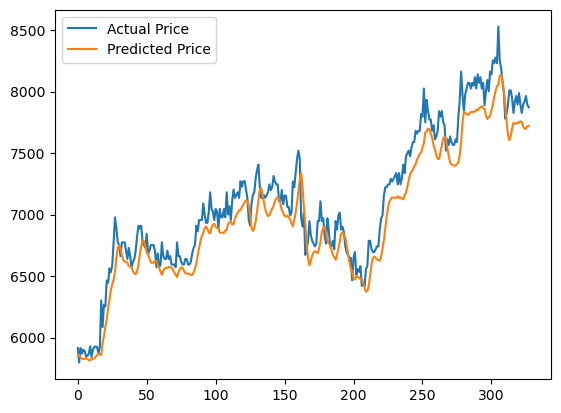

In [21]:
import matplotlib.pyplot as plt

plt.plot(y_test_actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.legend()
plt.show()

In [23]:
from ta import add_all_ta_features
from ta.utils import dropna

stock_data = dropna(stock_data)
stock_data.columns = stock_data.columns.get_level_values(0)
stock_data.reset_index(inplace=True)

stock_data = add_all_ta_features(stock_data, 
                                 open="Open", 
                                 close="Close", 
                                 high="High", 
                                 low="Low",
                                 volume="Volume")


In [37]:
stock_data

Price,Date,Close,High,Low,Open,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
0,2015-01-02,2171.209717,2179.418449,2158.896618,2179.418449,29302500.0,5.860500e+06,2.930250e+07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1,2015-01-05,2167.105469,2167.105469,2154.792369,2158.896736,25434500.0,3.129500e+07,3.868000e+06,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.189030,-0.189209,-0.189030
2,2015-01-06,2150.688477,2167.105946,2134.271007,2134.271007,48681500.0,3.129500e+07,-4.481350e+07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.757554,-0.760438,-0.945152
3,2015-01-07,2154.792725,2167.105826,2142.479623,2142.479623,40334000.0,3.129500e+07,-4.479500e+06,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.190834,0.190652,-0.756122
4,2015-01-08,2130.166016,2158.896578,2130.166016,2154.792212,54457000.0,-2.316200e+07,-5.893650e+07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.142881,-1.149462,-1.890361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,2022-12-26,7895.059570,7941.094903,7826.006571,7826.006571,20495900.0,-2.525957e+09,1.773179e+10,0.003453,1.079375e+07,...,-0.547701,-0.373153,-0.174548,-21.134002,-6.862514,-14.271488,8000.211297,0.882356,0.878486,263.624919
1926,2022-12-27,7918.077637,7964.112972,7895.059969,7918.077637,27193800.0,-2.535021e+09,1.775898e+10,0.011675,9.867303e+07,...,-0.517906,-0.402104,-0.115802,-25.036855,-10.497382,-14.539472,7998.606441,0.291550,0.291126,264.685068
1927,2022-12-28,7964.113281,7964.113281,7872.042607,7964.113281,40420200.0,-2.494601e+09,1.779941e+10,-0.166712,3.504012e+08,...,-0.442373,-0.410158,-0.032216,-26.888717,-13.775649,-13.113068,7998.363401,0.581399,0.579716,266.805344
1928,2022-12-29,7895.059570,7918.077237,7826.006571,7849.024238,47020900.0,-2.471090e+09,1.775238e+10,-0.082941,-1.635087e+08,...,-0.447576,-0.417641,-0.029934,-27.563562,-16.533232,-11.030330,7996.702263,-0.867061,-0.870842,263.624919


In [39]:
features = stock_data[['Close', 'Volume', 'trend_sma_fast', 'momentum_ppo']].dropna()
scaled_features = scaler.fit_transform(features)
X, y = create_sequences(scaled_features, seq_length)

In [45]:
last_sequence = scaled_data[-seq_length:]
last_sequence = last_sequence.reshape((1, seq_length, 1))
predicted_price = model.predict(last_sequence)
#predicted_price = scaler.inverse_transform(predicted_price)
print(f'Predicted next day price: {predicted_price[0][0]}') 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted next day price: 0.8775382041931152
